## Stemcell_YOLO_Object_Detection Compact of 20201031 version

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!pip uninstall -y keras
!pip install keras==2.2.4

import keras
print(keras.__version__)

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 317kB 4.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


Using TensorFlow backend.


2.2.4


In [3]:
# Keras 변환 코드 다운로드
%cd /content
!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3
  
# 다운로드된 디렉토리로 이동
%cd keras-yolo3

# 내용 확인 !pwd  !ls -al  

/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 8.39 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/keras-yolo3


In [4]:
#커스텀 데이터 업로드 : 파일이름 resize_data.zip
%cd /content/keras-yolo3

! pip install gdown
! gdown https://drive.google.com/uc?id=1mSAv7Afqjt2z6cHlQFh6GAMoLitPAdjJ

/content/keras-yolo3
Downloading...
From: https://drive.google.com/uc?id=1mSAv7Afqjt2z6cHlQFh6GAMoLitPAdjJ
To: /content/keras-yolo3/resize_data.zip
31.6MB [00:00, 68.0MB/s]


In [5]:
# 커스텀 데이터 zip 압축 파일 풀기 : 파일이름 resize_data.zip
!mkdir resize_data
!unzip resize_data.zip -d ./resize_data

Archive:  resize_data.zip
  inflating: ./resize_data/Annotations/resize_Cell_P1_0017.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0019.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0021.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0022.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0023.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0025.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0028.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0029.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0032.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0034.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0038.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0040.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0041.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0042.xml  
  inflating: ./resize_data/Annotations/resize_Cell_P1_0043.xml  

In [6]:
# 압출 풀린 파일들 확인 !ls -al resize_data

In [7]:
#모델 로그파일 확인   !ls -al logs/000

## 물체 탐지 실행


In [8]:
#yolo_cal.py 파일 업로드 
%cd /content/keras-yolo3

! gdown https://drive.google.com/uc?id=1fYGg1U7kTUehFTC48CWcSx46_HL19rcH
#https://drive.google.com/file/d/1fYGg1U7kTUehFTC48CWcSx46_HL19rcH/view?usp=sharing

/content/keras-yolo3
Downloading...
From: https://drive.google.com/uc?id=1fYGg1U7kTUehFTC48CWcSx46_HL19rcH
To: /content/keras-yolo3/yolo_cal.py
100% 8.63k/8.63k [00:00<00:00, 13.3MB/s]


In [9]:
from IPython.display import display 
from PIL import Image
from yolo_cal import YOLO

def do_object_detection(file, model_path, class_path):
  
  yolo = YOLO(model_path=model_path, classes_path=class_path)

  # 이미지 로딩
  image = Image.open(file)

  # 실행
  result_image = yolo.detect_image(image)  

  # 실행 결과 표시
  display(result_image)

In [34]:
#Unit definition from lab data
conversion_unit = float(2055.957)
limit_1 = float(0.3142)
multiplication_unit = float(3.77126)
mul_unit1 = 2.65809
mul_unit2 = 1.30859
mul_unit3 = 3.77126
conversion_ratio1 = 13.6541
conversion_ratio2 = 2.477
conversion_ratio3 = 6.31198

In [18]:
#커스텀 데이터 업로드 : 파일이름 trained_weights_final.h5
%cd /content/keras-yolo3

! gdown https://drive.google.com/uc?id=1EAKwEBdAAjK0dyN-u-ZXoUP320oKPcR-

/content/keras-yolo3
Downloading...
From: https://drive.google.com/uc?id=1EAKwEBdAAjK0dyN-u-ZXoUP320oKPcR-
To: /content/keras-yolo3/trained_weights_final.h5
247MB [00:01, 239MB/s]


/content/keras-yolo3
trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 5 boxes for img
Ignore 0.31 (57, 216) (95, 296)
Ignore 0.32 (187, 139) (226, 194)
Spread 0.32 (290, 165) (364, 312)
Polygonal 0.32 (187, 139) (226, 194)
Polygonal 0.38 (57, 216) (95, 296)
1.6696056659999385
['Ignore', 'Ignore', 'Spread', 'Polygonal', 'Polygonal']


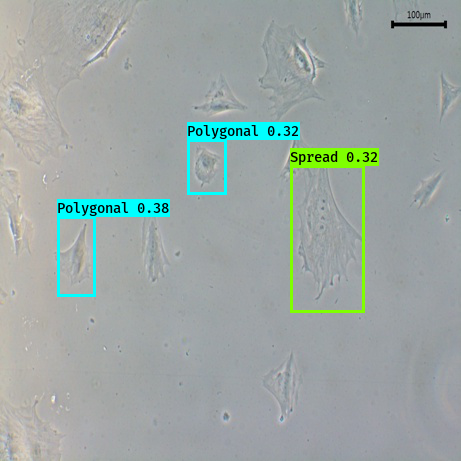

In [19]:
%cd /content/keras-yolo3

# do_object_detection('/content/0945.jpg', 'logs/000/ep063-loss69.857-val_loss72.440.h5', 'dental_image_in_voc_format/classes.txt')
do_object_detection('resize_data/JPEGImages/resize_Cell_P2_0239.jpg', 'trained_weights_final.h5', 'resize_data/classes.txt')


In [36]:
'''
YOLO 객체 결과를 입력 하여 세포 성장 예측 지표를 얻음
'''
labels = ['Ignore', 'Ignore', 'Spread', 'Polygonal', 'Polygonal']

x40Na = x40Nb = x40Nc = 0

for label in labels:
  if label == 'Polygonal':
    x40Na += 1
  elif label == 'Small':
    x40Nb += 1
  elif label == 'Spread':
    x40Nc += 1
#print(x40Na, x40Nb, x40Nc)


NA = conversion_unit * x40Na   
NB = conversion_unit * x40Nb   
NC = conversion_unit * x40Nc 

# 노화세포% 계산 ----------------------------------------

aged_cell_ratio = 100*(NC/(NA + NC))

print('노화세포 %는 ', aged_cell_ratio)

# 계대 시점 도달 예상 소요시간 계산 ----------------------------------------
days_to_passage = 0.0

if (NC/(NA+NB+NC)) > limit_1: 
    days_to_passage = ((1/2)-limit_1)/0.037
elif (NC/(NA+NB+NC)) <= limit_1:
    days_to_passage = 1460/((multiplication_unit*2))

print("예상 계대 시점은 ", days_to_passage)

# 예상 세포 수율 계산 ----------------------------------------
expected_cell_yield = conversion_ratio1*2*conversion_unit + conversion_ratio2*1*conversion_unit
print('예상 세포 수율은 ', expected_cell_yield)

# 세포 활성 등급 ----------------------------------------
activity_value = aged_cell_ratio/100

if activity_value >= 0.8:
  #'culture_grade = Grade_A
  print("Culture grade: Grade A")  
  print("""종합의견: 노화 세포가 거의 없고 지수적으로 성장하는 중입니다. 
          우수한 성장 상태를 보여주고 있어서, 계대 시점이 곧 다가올 것 같습니다.""")

elif activity_value >= 0.6:
  #culture_grade = B
  print("Culture grade: Grade B")
  print("""종합의견: 노화세포가 포함되어 있지만 건강하게 성장 중인 세포가 잘 유지되는 중입니다.  
           계대 시점을 놓치지 않도록 주의하시면 좋은 상태를 유지할 수 있을것으로 기대됩니다.""")


elif activity_value >= 0.4:
  #culture_grade = C
  print("Culture grade: Grade C")
  print("""종합의견: 노화 세포의 비율이 높아졌지만 아직은 건강한 세포의 비율이 높게 유지되는 중입니다.  
           Confluence에 도달하기 까지 시간 소요가 증가할 것으로 예측 됩니다.""")

elif activity_value >= 0.2:
  #culture_grade = D
  print("Culture grade: Grade D")
  print("""종합의견: 노화세포의 비율이 높아져서 전반적인 세포 활성이 낮은 상태일 것으로 예측됩니다.  
           계대배양 이후에는 노화 세포의 비율이 더 높아지고, 성장에 특화된 tumorigenic한 세포 변형이 일어날 수도 있습니다.""")

elif activity_value < 0.2:
  #culture_grade = E
  print("Culture grade: Grade E")
  print("""종합의견: 노화세포가 대부분을 차지하고 있어서, 다음 계대 배양이 어려울 것 으로 예측됩니다.  
           노화된 세포를 연구하는 것이 아니라면, 배양 유지를 하지 않는 것이 바람직할 것으로 예측됩니다.""")


노화세포 %는  33.333333333333336
예상 계대 시점은  5.021621621621622
예상 세포 수율은  61237.090436399994
Culture grade: Grade D
종합의견: 노화세포의 비율이 높아져서 전반적인 세포 활성이 낮은 상태일 것으로 예측됩니다.  
           계대배양 이후에는 노화 세포의 비율이 더 높아지고, 성장에 특화된 tumorigenic한 세포 변형이 일어날 수도 있습니다.
